In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
plt.rcParams['figure.dpi'] = 100

# Quadrature offsets as an origin of Fano lineshapes

We consider here the reflection from a single port cavity and show that asymmetric Fano resonance lineshapes can arise from offsets in the quadratures from crosstalk via an additional reflection path that does not enter the cavity.

Ideally, the reflection coefficient should be given by:

$$
S_{11} = 1 - \frac{\eta \kappa}{\kappa/2 - i\Delta}
$$

where $\eta = \kappa / \kappa_{ext}$ is the coupling efficiency, ranging from 0 to 1, $\kappa$ is the total (loaded) cavity linewidth, $\kappa_{ext}$ is the external coupling rate, and $\Delta =  \omega - \omega_0$ is the detuning of the probe frequency $\omega$ from the cavity resonance frequency $\omega_0$.

If part of of the reflection signal comes from a reflection that does not enter the cavity (for example, from an additional path that somehow bounces back into the measurement port), then the new $S_{11}$ will include an offset in the quadratures:

$$
S_{11} = Ae^{i\theta} + 1 - \frac{\eta \kappa}{\kappa/2 - i\Delta}
$$

where $A$ and $\theta$ are real numbers. (Here, I have not corrected for the change in normalisation to keep the formula simple). If the offset contains an imaginary component ($\theta$ not zero or pi), then the resulting $|S_{11}|$ will have an asymmetric Fano lineshape.

Below, we will illustrate this using intereactive plots.

## First illustrate with no Fano

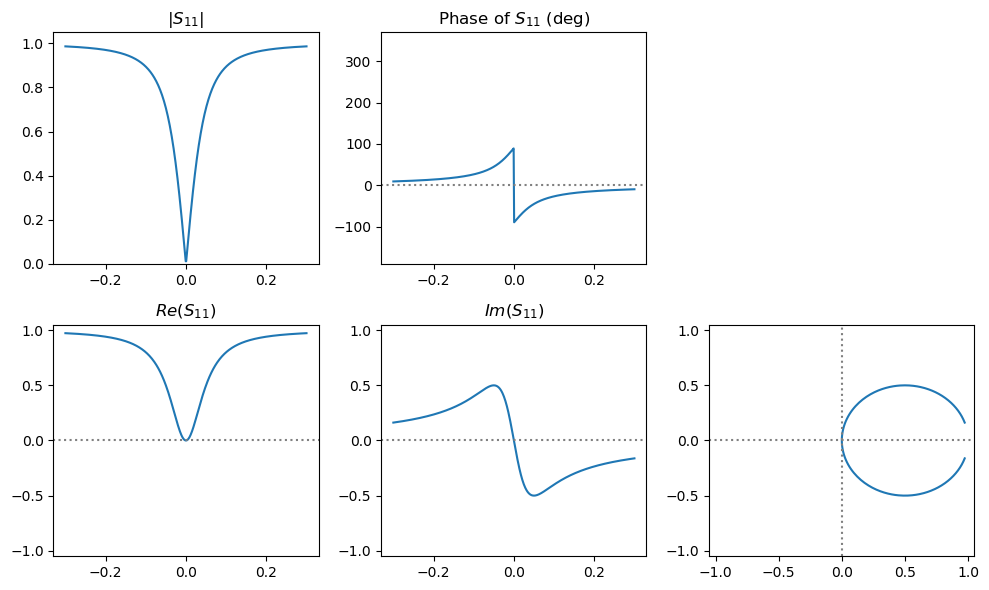

In [3]:
def make_plots(d, S11, lim=1.05):
    plt.subplots(figsize=(10,6))
    plt.subplot(231)
    plt.plot(d,np.abs(S11))
    plt.ylim((0,lim))
    plt.title("$|S_{11}|$")
    plt.subplot(232)
    plt.plot(d,np.unwrap(np.angle(S11))/np.pi*180)
    plt.ylim((-190,370))
    plt.axhline(0,c='grey', ls=':')
    plt.title("Phase of $S_{11}$ (deg)")
    plt.subplot(234)
    plt.plot(d,np.real(S11))
    plt.ylim((-lim,lim))
    plt.axhline(0,c='grey', ls=':')
    plt.title("$Re(S_{11})$")
    plt.subplot(235)
    plt.plot(d,np.imag(S11))
    plt.ylim((-lim,lim))
    plt.axhline(0,c='grey', ls=':')
    plt.title("$Im(S_{11})$")
    plt.subplot(236)
    plt.plot(np.real(S11), np.imag(S11))
    plt.ylim((-lim,lim))
    plt.xlim((-lim,lim))
    plt.axhline(0,c='grey', ls=':')
    plt.axvline(0,c='grey', ls=':')
    plt.tight_layout()
    
def update1(eta=0.5):
    k = 0.1
    d = np.linspace(-3*k,3*k,500)
    S11 = 1-eta*k/(-1j*d+k/2)
    make_plots(d, S11)
    
interact(update1, eta=(0,1,0.1));

## Also useful: Illustrate the effect of getting the reference phase incorrect

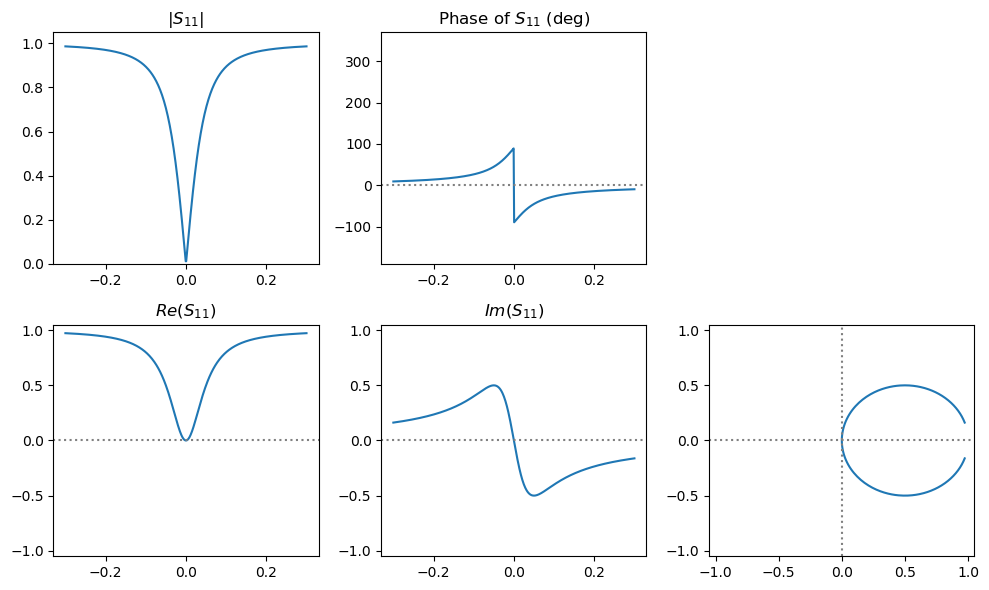

In [4]:
def update1(eta=0.5, phi=0):
    k = 0.1
    d = np.linspace(-3*k,3*k,500)
    S11 = 1-eta*k/(-1j*d+k/2)
    S11 *= np.exp(1j*phi/180*np.pi)
    make_plots(d,S11)
    
interact(update1, eta=(0,1,0.1), phi=(0,360,10));

Note that if you pick the incorrect reference phase, the real-part looks asymmetric (even though the magnitude is symmetric). That is because if you pick the wrong phase, then the real and imaginary parts intermix. If you pick the correct reference phase, then the real part always looks symmetric. 

Note also: here, we have taken a reference phase that is constant and independent of frequency. In a real device, in which your cavity is connected to your VNA with a cable, the phase is, of course, at least linearly dependent on frequency! 

(Unless you have corrected properly for the electrical length, which you should always do at the start of your measurements, but which almost nobody does...)

For a high-Q resonance, it is likely still not a bad approximation that the phase is constant over the frequency range of the resonance. However, for lower-Q (or very bad choices software choices of the electrical length calibration of the VNA), the phase may vary significantly across the resonance. In this case, you will need to correct for a frequency dependent phase in order to get the real-part of S11 to be symmetric. 

## Now illustrate the effect of including an inteference term

We will add a term $A \exp(i \theta)$ to $S_{11}$:

$$
S_{11} = 1 - \frac{\eta \kappa}{\kappa/2 - i\Delta} + A\exp(i \theta)
$$

For now, we will not worry about trying to preserve the total normalisation...

`phi` is the reference phase of the VNA

`theta` is the phase of the "crosstalk / reflection" signal that is added to S11

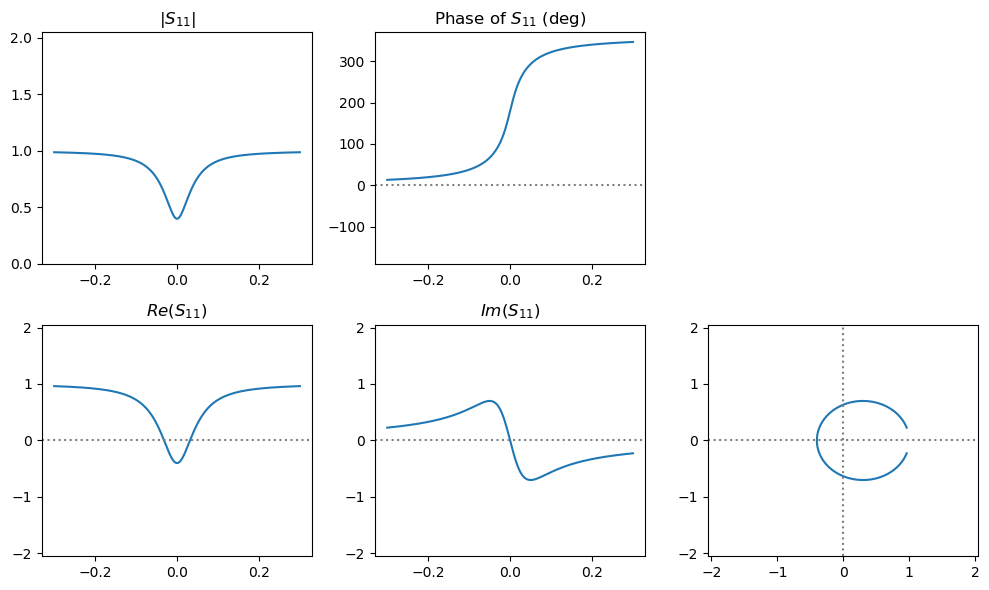

In [5]:
def update1(eta=0.7, A=0, theta=0, phi=0):
    k = 0.1
    d = np.linspace(-3*k,3*k,500)
    S11 = 1-eta*k/(-1j*d+k/2)
    S11 += A*np.exp(1j*theta/180*np.pi)
    S11 *= np.exp(1j*phi/180*np.pi)
    make_plots(d,S11,lim=2.05)

    
interact(update1, eta=(0,1,0.1), A = (-1,1,0.1), theta = (0,360,10), phi=(0,360,10));

Note that although the $|S_{11}|$ gets a funny asymmetric shape, the real quadrature (with the appropriate phase reference angle) is **still perfectly symmetric!!!!!**